# Úkol č. 1 - vizualizace dat a web scraping (do 11. října)

  * V rámci tohoto úkolu musíte stáhnout dat z webu (tzv. _web scraping_, velmi základní) a následně data zpracovat a vizualizovat.
  * Cílem bude stáhnout data ze serveru https://www.psp.cz/sqw/hlasovani.sqw?o=8 týkající hlasování současné poslanecké sněmovny, uložit tato data v tabulkovém formátu a pak vymyslet vizualizace a zobrazení dat, které umožní orientaci v těchto datech a zvýrazní zajímavé informace a zobrazit přehledně časový vývoj různých veličin.
 
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

## Data

 * Měli byste stáhnout data ze všech hlasování současné poslanecké sněmovny (tj. od voleb v roce 2017) a to až na úroveň jednotlivých poslanců. 
 * Data by měla obsahovat i stručný popis toho, o jaké hlasování šlo.

## Pokyny k vypracování

**Základní body zadání**, za jejichž (poctivé) vypracování získáte **8 bodů**:
  * Strojově stáhněte data a uložte je do vhodného formátu, který se Vám bude dále dobře zpracovávat. 
  * **I když nemusíte mít sněmovnu rádi, snažte se nezahltit server a mezi požadavky na stránku mějte alespoň vteřinu mezeru.**
  * V druhé části Vašeho Jupyter notebooku pracujte se staženými daty v souborech, které jsou výsledkem Vašeho stahovacího skriptu (aby opravující nemusel spouštět stahování z webu).
  * S využitím vybraných nástrojů zpracujte data a vymyslete vizualizace a grafy, aby bylo vidět následující:
    * Odchody a přeběhnutí poslanců mezi jednotlivými stranami.
    * Jakou mají jednotliví poslanci docházku (účast na hlasování) a jak jsou na tom s docházkou strany jako celek.
    * Jak často spolu jednotlivé strany hlasují ve shodě a jak často hlasují odlišně.
    * Jak jsou poslanci jednotlivých stran jednotní v hlasování (jak často hlasují stejně, kdo jsou největší rebelové).

**Další body zadání** za případné další body (můžete si vybrat, maximum bodů za úkol je každopádně 12 bodů):
  * Ve vizualizacích a grafech nějak zachyťte časový vývoj (např. jak se mění docházka, shoda mezi stranami atp.).
  * Najděte jednotlivé poslance, kteří se nejvíce shodují při svém hlasování či kteří mají co nejpodobnější účast na hlasování.
  * Zkuste rozlišit v datech důležitá hlasování a zpracujte vizualizace (také) pro ně.
  * Zkuste najít hlasování, kde poslanci hlasovali nejvíce jinak, než obvykle.
  
## Tipy a triky
  * Balíčky iportujte na začátku notebooku (příp. na začátku scrapovací a pak na začátku vizualizační části).
  * Využívejte markdown buňky (jako je ta, ve které je tento text) a naspisy, abyste usnadnily orientaci opravující(mu).
  * Pečlivě si vybírejte grafy a vizualizace, aby co nejlépe vyjádřily to, co vyjádřit chcete. Doporučuji projít si pro inspiraci alespoň galerie balíčků `matplotlib` a `seaborn`.

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-VZD/homeworks/index.html.
  * Odevzdejte Jupyter Notebook (příp. doplněn skripty), ale i soubor(y) se staženými daty (ať opravující nemusí stahovat data).
  * Opravující Vám může umožnit úkol dodělat či opravit a získat tak další body. První verze je ale důležitá a bude-li odbytá, budete za to penalizováni.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Bez násl. řádku někdy nefunguje vykreslování grafů v Jupyter noteboocích
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')

In [14]:
dfMeeting = pd.read_csv("meeting.csv", encoding='windows-1250')
dfMeeting['votingDate'] = pd.to_datetime(dfMeeting['votingDate'], format='%d. %m. %Y %H:%M')
dfVote = pd.read_csv("vote.csv", encoding='windows-1250')
dfMeeting


,topicID,topicName,meetingNum,votingDate
0,0,Inf. o ustavení volební komise PS a volbě členů,1,2017-11-20 13:53:00
1,1,Inf. o ustavení volební komise PS a volbě členů,1,2017-11-20 13:53:00
2,2,Procedurální hlasování,1,2017-11-20 14:47:00
3,3,Náv.na stanovení počtu čl. MIV,1,2017-11-20 15:39:00
4,4,Náv.na stanovení počtu čl. MIV,1,2017-11-20 15:39:00
...,...,...,...,...
4936,4936,Novela z. o provozu vozidel na poz. komunikací...,39,2019-12-18 12:52:00
4937,4937,Návrh na zřízení VK pro vyhodnocení vlivu auto...,39,2019-12-18 17:34:00
4938,4938,Novela z. - občanský soudní řád (sněmovní tisk...,39,2019-12-18 17:58:00
4939,4939,Procedurální hlasování,39,2019-12-18 19:00:00


Stažená data jsou v formatu .csv. Data jsem vytáhl pomocí skriptu scrapper.py. Jak lze vidět, tabulka má skoro 1milion záznamů. Jedná se o schůze 1-39. Samozrejmě lze stáhnou i zbytek, ale z časových a pamětových důvodů (VScode má problém otevřít takto velká soubor) jsem předčasně ukončil scrapování.

Každý záznam tabulky dfMeeting ukládá jednotlivá témata hlasování. Jedná se o:
* ID tematu:
* Tema: stručný popis
* meetingNum: číslo schůze během kterého se hlasovalo
* votingDate: den a čas hlasování

dfVote obsahuje:

Kvůli pamětovým problémům jsem musel pri skrappování rozdělit data do 2 souborů, to ale nevadí, pomocí merge můžeme data zpátky spojit

In [99]:
df = dfVote.merge(dfMeeting, on='topicID', how='left', right_index=True)
typesOfVotes = df['vote'].unique().tolist()
poslanci = df['name'].unique().tolist()
parties = df['political party'].unique().tolist()
df

,name,political party,topicID,vote,topicName,meetingNum,votingDate
0,Věra Adámková,ANO,0,yes,Inf. o ustavení volební komise PS a volbě členů,1,2017-11-20 13:53:00
1,Andrej Babiš,ANO,0,yes,Inf. o ustavení volební komise PS a volbě členů,1,2017-11-20 13:53:00
2,Andrea Babišová,ANO,0,yes,Inf. o ustavení volební komise PS a volbě členů,1,2017-11-20 13:53:00
3,Margita Balaštíková,ANO,0,yes,Inf. o ustavení volební komise PS a volbě členů,1,2017-11-20 13:53:00
4,Josef Bělica,ANO,0,yes,Inf. o ustavení volební komise PS a volbě členů,1,2017-11-20 13:53:00
...,...,...,...,...,...,...,...
987395,Marian Bojko,Nezařaz,4939,excused,Procedurální hlasování,39,2019-12-18 19:00:00
987396,Václav Klaus,Nezařaz,4939,yes,Procedurální hlasování,39,2019-12-18 19:00:00
987397,Zuzana Majerová Zahradníková,Nezařaz,4939,yes,Procedurální hlasování,39,2019-12-18 19:00:00
987398,Ivana Nevludová,Nezařaz,4939,refrained,Procedurální hlasování,39,2019-12-18 19:00:00


**ukol 1**

In [76]:
peopleThatChanged = []
for poslanec in poslanci:
    poslanecDF = df[df['name'] == poslanec]
    parties = (poslanecDF['political party']).unique().tolist()
    if(len(parties) > 1):
        print(poslanec, parties)
        peopleThatChanged.append( (poslanec, parties))

Václav Klaus ['ODS', 'Nezařaz']
Zuzana Majerová Zahradníková ['ODS', 'Nezařaz']
Marian Bojko ['SPD', 'Nezařaz']
Ivana Nevludová ['SPD', 'Nezařaz']
Lubomír Volný ['SPD', 'Nezařaz']
Jaroslav Foldyna ['ČSSD', 'SPD']


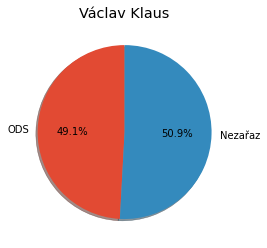

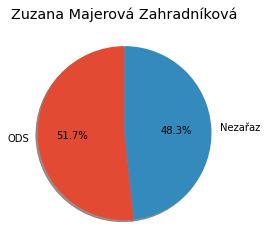

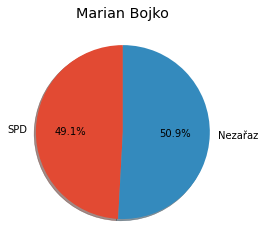

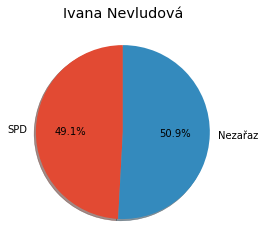

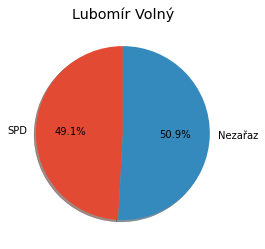

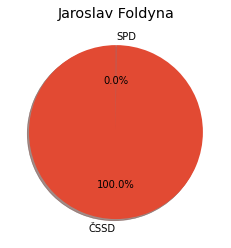

In [95]:
for poslanec in peopleThatChanged:
    poslanecDF = df[df['name'] == poslanec[0]]
    total = len(poslanecDF.index)
    size = []
    for party in poslanec[1]:
        size.append( len(poslanecDF[poslanecDF['political party'] == party].index) * 100 / total )
    
    fig1, ax1 = plt.subplots()
    ax1.pie(size, labels = poslanec[1],  autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title(poslanec[0])
plt.show()

**ukol 2**

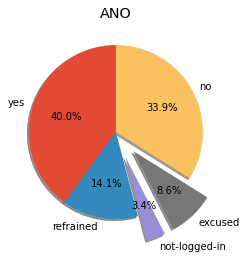

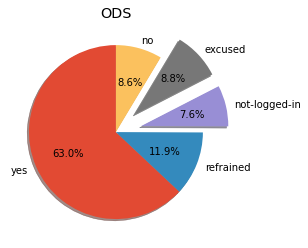

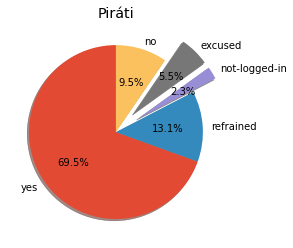

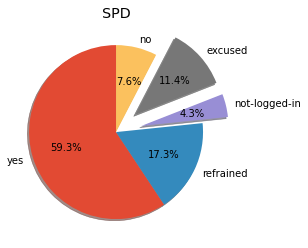

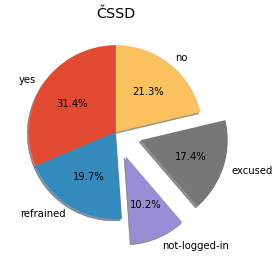

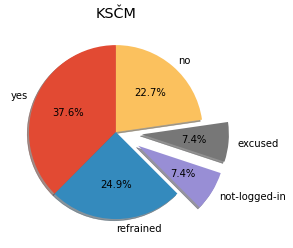

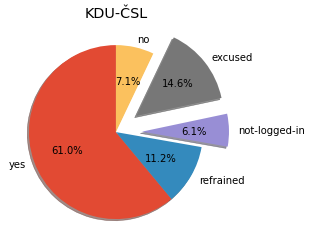

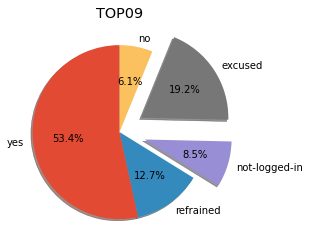

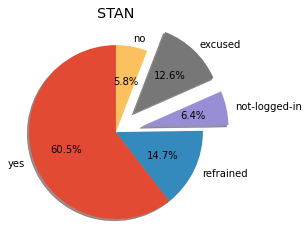

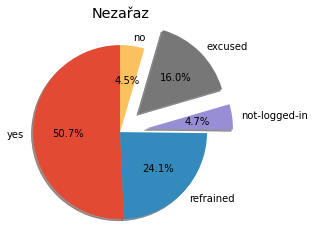

In [109]:
#DA == didntAttend
DAlist = ['not-logged-in', 'excused']
DADF = df[df['vote'].isin( DAlist)]
for party in parties:
    tmpdf = df[df['political party'] == party]
    totalSize = len(tmpdf.index)
    size = []
    for typeVote in typesOfVotes:
        size.append(len(tmpdf[tmpdf['vote'] == typeVote].index)*100/totalSize)
    fig1, ax1 = plt.subplots()
    explode = (0, 0, 0.3, 0.3, 0) 
    
    ax1.pie(size, explode = explode, labels = typesOfVotes,  autopct='%1.1f%%', shadow=True, startangle=90)
    plt.title(party)
    
plt.show()
    

#DApeople = DADF['name'].unique().tolist()

Jednoduchým filtrovaním můžeme zjistit výsledky jednotlivých hlasování

In [16]:
tmp = df[['votingDate', 'topicID', 'vote']]
d=[]
for i in tmp['topicID'].unique():
    topic= tmp[tmp['topicID'] == i]
    majority = (-1, "")
    for typeVote in typesOfVotes:
        amount = len(topic[topic['vote'] == typeVote].index)
        print(i, typeVote, amount)
        if amount > majority[0]:
            majority = (amount, typeVote)
    d.append((i, topic.iloc[0]['votingDate'], majority[1]))
    print('majority for topic ', i, ' voted for ', str(majority[1])  )

0 yes 191
0 refrained 5
0 not-logged-in 3
0 excused 1
0 no 0
majority for topic  0  voted for  yes
1 yes 194
1 refrained 4
1 not-logged-in 1
1 excused 1
1 no 0
majority for topic  1  voted for  yes
2 yes 50
2 refrained 19
2 not-logged-in 1
2 excused 1
2 no 129
majority for topic  2  voted for  no
3 yes 56
3 refrained 43
3 not-logged-in 0
3 excused 1
3 no 100
majority for topic  3  voted for  no
4 yes 174
4 refrained 6
4 not-logged-in 0
4 excused 1
4 no 19
majority for topic  4  voted for  yes
5 yes 189
5 refrained 1
5 not-logged-in 8
5 excused 2
5 no 0
majority for topic  5  voted for  yes
6 yes 115
6 refrained 13
6 not-logged-in 5
6 excused 1
6 no 66
majority for topic  6  voted for  yes
7 yes 188
7 refrained 7
7 not-logged-in 3
7 excused 1
7 no 1
majority for topic  7  voted for  yes
8 yes 91
8 refrained 19
8 not-logged-in 8
8 excused 3
8 no 79
majority for topic  8  voted for  yes
9 yes 146
9 refrained 27
9 not-logged-in 8
9 excused 3
9 no 16
majority for topic  9  voted for  yes
10

85 no 4
majority for topic  85  voted for  yes
86 yes 165
86 refrained 9
86 not-logged-in 4
86 excused 22
86 no 0
majority for topic  86  voted for  yes
87 yes 158
87 refrained 15
87 not-logged-in 5
87 excused 22
87 no 0
majority for topic  87  voted for  yes
88 yes 165
88 refrained 7
88 not-logged-in 5
88 excused 22
88 no 1
majority for topic  88  voted for  yes
89 yes 170
89 refrained 4
89 not-logged-in 4
89 excused 22
89 no 0
majority for topic  89  voted for  yes
90 yes 131
90 refrained 3
90 not-logged-in 54
90 excused 12
90 no 0
majority for topic  90  voted for  yes
91 yes 145
91 refrained 10
91 not-logged-in 22
91 excused 12
91 no 11
majority for topic  91  voted for  yes
92 yes 8
92 refrained 137
92 not-logged-in 11
92 excused 10
92 no 34
majority for topic  92  voted for  refrained
93 yes 9
93 refrained 65
93 not-logged-in 9
93 excused 10
93 no 107
majority for topic  93  voted for  no
94 yes 116
94 refrained 37
94 not-logged-in 5
94 excused 10
94 no 32
majority for topic  94 

167 yes 53
167 refrained 42
167 not-logged-in 1
167 excused 0
167 no 104
majority for topic  167  voted for  no
168 yes 30
168 refrained 55
168 not-logged-in 1
168 excused 0
168 no 114
majority for topic  168  voted for  no
169 yes 39
169 refrained 52
169 not-logged-in 1
169 excused 0
169 no 108
majority for topic  169  voted for  no
170 yes 39
170 refrained 53
170 not-logged-in 1
170 excused 0
170 no 107
majority for topic  170  voted for  no
171 yes 51
171 refrained 42
171 not-logged-in 1
171 excused 0
171 no 106
majority for topic  171  voted for  no
172 yes 53
172 refrained 16
172 not-logged-in 1
172 excused 0
172 no 130
majority for topic  172  voted for  no
173 yes 50
173 refrained 55
173 not-logged-in 1
173 excused 0
173 no 94
majority for topic  173  voted for  no
174 yes 68
174 refrained 45
174 not-logged-in 1
174 excused 0
174 no 86
majority for topic  174  voted for  no
175 yes 43
175 refrained 51
175 not-logged-in 1
175 excused 0
175 no 105
majority for topic  175  voted fo

244 no 116
majority for topic  244  voted for  no
245 yes 78
245 refrained 0
245 not-logged-in 0
245 excused 5
245 no 117
majority for topic  245  voted for  no
246 yes 139
246 refrained 5
246 not-logged-in 44
246 excused 12
246 no 0
majority for topic  246  voted for  yes
247 yes 178
247 refrained 10
247 not-logged-in 2
247 excused 10
247 no 0
majority for topic  247  voted for  yes
248 yes 187
248 refrained 1
248 not-logged-in 2
248 excused 10
248 no 0
majority for topic  248  voted for  yes
249 yes 74
249 refrained 10
249 not-logged-in 3
249 excused 10
249 no 103
majority for topic  249  voted for  no
250 yes 120
250 refrained 64
250 not-logged-in 2
250 excused 10
250 no 4
majority for topic  250  voted for  yes
251 yes 79
251 refrained 25
251 not-logged-in 3
251 excused 10
251 no 83
majority for topic  251  voted for  no
252 yes 182
252 refrained 6
252 not-logged-in 2
252 excused 10
252 no 0
majority for topic  252  voted for  yes
253 yes 182
253 refrained 5
253 not-logged-in 3
253

317 excused 48
317 no 0
majority for topic  317  voted for  yes
318 yes 115
318 refrained 13
318 not-logged-in 23
318 excused 49
318 no 0
majority for topic  318  voted for  yes
319 yes 81
319 refrained 22
319 not-logged-in 23
319 excused 49
319 no 25
majority for topic  319  voted for  yes
320 yes 65
320 refrained 17
320 not-logged-in 23
320 excused 49
320 no 46
majority for topic  320  voted for  yes
321 yes 107
321 refrained 24
321 not-logged-in 20
321 excused 49
321 no 0
majority for topic  321  voted for  yes
322 yes 116
322 refrained 17
322 not-logged-in 19
322 excused 48
322 no 0
majority for topic  322  voted for  yes
323 yes 58
323 refrained 20
323 not-logged-in 19
323 excused 48
323 no 55
majority for topic  323  voted for  yes
324 yes 112
324 refrained 22
324 not-logged-in 18
324 excused 48
324 no 0
majority for topic  324  voted for  yes
325 yes 57
325 refrained 20
325 not-logged-in 17
325 excused 48
325 no 58
majority for topic  325  voted for  no
326 yes 123
326 refrained

391 no 1
majority for topic  391  voted for  yes
392 yes 139
392 refrained 23
392 not-logged-in 15
392 excused 23
392 no 0
majority for topic  392  voted for  yes
393 yes 90
393 refrained 47
393 not-logged-in 15
393 excused 23
393 no 25
majority for topic  393  voted for  yes
394 yes 142
394 refrained 6
394 not-logged-in 26
394 excused 26
394 no 0
majority for topic  394  voted for  yes
395 yes 77
395 refrained 7
395 not-logged-in 18
395 excused 21
395 no 77
majority for topic  395  voted for  yes
396 yes 158
396 refrained 3
396 not-logged-in 18
396 excused 21
396 no 0
majority for topic  396  voted for  yes
397 yes 71
397 refrained 16
397 not-logged-in 31
397 excused 20
397 no 62
majority for topic  397  voted for  yes
398 yes 145
398 refrained 4
398 not-logged-in 31
398 excused 20
398 no 0
majority for topic  398  voted for  yes
399 yes 45
399 refrained 8
399 not-logged-in 36
399 excused 20
399 no 91
majority for topic  399  voted for  no
400 yes 39
400 refrained 21
400 not-logged-in

466 no 24
majority for topic  466  voted for  yes
467 yes 86
467 refrained 40
467 not-logged-in 32
467 excused 27
467 no 15
majority for topic  467  voted for  yes
468 yes 117
468 refrained 23
468 not-logged-in 33
468 excused 27
468 no 0
majority for topic  468  voted for  yes
469 yes 126
469 refrained 17
469 not-logged-in 30
469 excused 27
469 no 0
majority for topic  469  voted for  yes
470 yes 122
470 refrained 18
470 not-logged-in 33
470 excused 27
470 no 0
majority for topic  470  voted for  yes
471 yes 124
471 refrained 20
471 not-logged-in 30
471 excused 26
471 no 0
majority for topic  471  voted for  yes
472 yes 129
472 refrained 22
472 not-logged-in 23
472 excused 26
472 no 0
majority for topic  472  voted for  yes
473 yes 135
473 refrained 18
473 not-logged-in 21
473 excused 25
473 no 1
majority for topic  473  voted for  yes
474 yes 132
474 refrained 22
474 not-logged-in 21
474 excused 25
474 no 0
majority for topic  474  voted for  yes
475 yes 135
475 refrained 21
475 not-l

543 yes 40
543 refrained 56
543 not-logged-in 24
543 excused 51
543 no 29
majority for topic  543  voted for  refrained
544 yes 65
544 refrained 18
544 not-logged-in 21
544 excused 51
544 no 45
majority for topic  544  voted for  yes
545 yes 126
545 refrained 3
545 not-logged-in 20
545 excused 51
545 no 0
majority for topic  545  voted for  yes
546 yes 65
546 refrained 17
546 not-logged-in 23
546 excused 51
546 no 44
majority for topic  546  voted for  yes
547 yes 92
547 refrained 16
547 not-logged-in 21
547 excused 48
547 no 23
majority for topic  547  voted for  yes
548 yes 97
548 refrained 21
548 not-logged-in 28
548 excused 27
548 no 27
majority for topic  548  voted for  yes
549 yes 134
549 refrained 15
549 not-logged-in 25
549 excused 26
549 no 0
majority for topic  549  voted for  yes
550 yes 153
550 refrained 4
550 not-logged-in 17
550 excused 26
550 no 0
majority for topic  550  voted for  yes
551 yes 154
551 refrained 1
551 not-logged-in 19
551 excused 26
551 no 0
majority fo

majority for topic  616  voted for  yes
617 yes 122
617 refrained 24
617 not-logged-in 15
617 excused 36
617 no 3
majority for topic  617  voted for  yes
618 yes 55
618 refrained 20
618 not-logged-in 29
618 excused 34
618 no 62
majority for topic  618  voted for  no
619 yes 134
619 refrained 4
619 not-logged-in 28
619 excused 34
619 no 0
majority for topic  619  voted for  yes
620 yes 49
620 refrained 85
620 not-logged-in 28
620 excused 34
620 no 4
majority for topic  620  voted for  refrained
621 yes 95
621 refrained 10
621 not-logged-in 31
621 excused 38
621 no 26
majority for topic  621  voted for  yes
622 yes 136
622 refrained 8
622 not-logged-in 20
622 excused 36
622 no 0
majority for topic  622  voted for  yes
623 yes 138
623 refrained 7
623 not-logged-in 19
623 excused 36
623 no 0
majority for topic  623  voted for  yes
624 yes 141
624 refrained 4
624 not-logged-in 18
624 excused 36
624 no 1
majority for topic  624  voted for  yes
625 yes 148
625 refrained 13
625 not-logged-in 4

majority for topic  697  voted for  no
698 yes 165
698 refrained 1
698 not-logged-in 16
698 excused 13
698 no 5
majority for topic  698  voted for  yes
699 yes 155
699 refrained 17
699 not-logged-in 15
699 excused 13
699 no 0
majority for topic  699  voted for  yes
700 yes 75
700 refrained 1
700 not-logged-in 21
700 excused 15
700 no 88
majority for topic  700  voted for  no
701 yes 70
701 refrained 8
701 not-logged-in 10
701 excused 15
701 no 97
majority for topic  701  voted for  no
702 yes 69
702 refrained 6
702 not-logged-in 10
702 excused 15
702 no 100
majority for topic  702  voted for  no
703 yes 173
703 refrained 1
703 not-logged-in 9
703 excused 15
703 no 2
majority for topic  703  voted for  yes
704 yes 70
704 refrained 17
704 not-logged-in 9
704 excused 15
704 no 89
majority for topic  704  voted for  no
705 yes 68
705 refrained 44
705 not-logged-in 8
705 excused 15
705 no 65
majority for topic  705  voted for  yes
706 yes 67
706 refrained 38
706 not-logged-in 8
706 excused 

782 yes 117
782 refrained 35
782 not-logged-in 27
782 excused 21
782 no 0
majority for topic  782  voted for  yes
783 yes 123
783 refrained 3
783 not-logged-in 23
783 excused 21
783 no 30
majority for topic  783  voted for  yes
784 yes 34
784 refrained 39
784 not-logged-in 13
784 excused 21
784 no 93
majority for topic  784  voted for  no
785 yes 45
785 refrained 77
785 not-logged-in 14
785 excused 21
785 no 43
majority for topic  785  voted for  refrained
786 yes 157
786 refrained 5
786 not-logged-in 14
786 excused 21
786 no 3
majority for topic  786  voted for  yes
787 yes 139
787 refrained 15
787 not-logged-in 13
787 excused 21
787 no 12
majority for topic  787  voted for  yes
788 yes 78
788 refrained 23
788 not-logged-in 13
788 excused 21
788 no 65
majority for topic  788  voted for  yes
789 yes 78
789 refrained 21
789 not-logged-in 4
789 excused 20
789 no 77
majority for topic  789  voted for  yes
790 yes 166
790 refrained 10
790 not-logged-in 4
790 excused 20
790 no 0
majority fo

861 yes 152
861 refrained 31
861 not-logged-in 5
861 excused 12
861 no 0
majority for topic  861  voted for  yes
862 yes 64
862 refrained 37
862 not-logged-in 4
862 excused 15
862 no 80
majority for topic  862  voted for  no
863 yes 128
863 refrained 5
863 not-logged-in 43
863 excused 24
863 no 0
majority for topic  863  voted for  yes
864 yes 40
864 refrained 33
864 not-logged-in 29
864 excused 27
864 no 71
majority for topic  864  voted for  no
865 yes 39
865 refrained 17
865 not-logged-in 17
865 excused 24
865 no 103
majority for topic  865  voted for  no
866 yes 115
866 refrained 18
866 not-logged-in 28
866 excused 38
866 no 1
majority for topic  866  voted for  yes
867 yes 131
867 refrained 3
867 not-logged-in 27
867 excused 38
867 no 1
majority for topic  867  voted for  yes
868 yes 41
868 refrained 37
868 not-logged-in 26
868 excused 38
868 no 58
majority for topic  868  voted for  no
869 yes 52
869 refrained 20
869 not-logged-in 23
869 excused 38
869 no 67
majority for topic  8

939 yes 154
939 refrained 5
939 not-logged-in 5
939 excused 35
939 no 1
majority for topic  939  voted for  yes
940 yes 23
940 refrained 26
940 not-logged-in 5
940 excused 35
940 no 111
majority for topic  940  voted for  no
941 yes 20
941 refrained 12
941 not-logged-in 6
941 excused 35
941 no 127
majority for topic  941  voted for  no
942 yes 19
942 refrained 30
942 not-logged-in 5
942 excused 35
942 no 111
majority for topic  942  voted for  no
943 yes 19
943 refrained 29
943 not-logged-in 6
943 excused 35
943 no 111
majority for topic  943  voted for  no
944 yes 158
944 refrained 1
944 not-logged-in 5
944 excused 35
944 no 1
majority for topic  944  voted for  yes
945 yes 17
945 refrained 26
945 not-logged-in 7
945 excused 35
945 no 115
majority for topic  945  voted for  no
946 yes 158
946 refrained 2
946 not-logged-in 5
946 excused 35
946 no 0
majority for topic  946  voted for  yes
947 yes 158
947 refrained 2
947 not-logged-in 5
947 excused 35
947 no 0
majority for topic  947  vo

1014 not-logged-in 22
1014 excused 13
1014 no 54
majority for topic  1014  voted for  yes
1015 yes 159
1015 refrained 4
1015 not-logged-in 21
1015 excused 13
1015 no 3
majority for topic  1015  voted for  yes
1016 yes 87
1016 refrained 20
1016 not-logged-in 25
1016 excused 13
1016 no 55
majority for topic  1016  voted for  yes
1017 yes 165
1017 refrained 7
1017 not-logged-in 26
1017 excused 2
1017 no 0
majority for topic  1017  voted for  yes
1018 yes 178
1018 refrained 6
1018 not-logged-in 14
1018 excused 2
1018 no 0
majority for topic  1018  voted for  yes
1019 yes 125
1019 refrained 24
1019 not-logged-in 39
1019 excused 1
1019 no 11
majority for topic  1019  voted for  yes
1020 yes 26
1020 refrained 130
1020 not-logged-in 20
1020 excused 2
1020 no 22
majority for topic  1020  voted for  refrained
1021 yes 47
1021 refrained 23
1021 not-logged-in 50
1021 excused 2
1021 no 78
majority for topic  1021  voted for  no
1022 yes 56
1022 refrained 18
1022 not-logged-in 44
1022 excused 2
1022

1092 excused 26
1092 no 71
majority for topic  1092  voted for  no
1093 yes 81
1093 refrained 32
1093 not-logged-in 12
1093 excused 26
1093 no 49
majority for topic  1093  voted for  yes
1094 yes 151
1094 refrained 15
1094 not-logged-in 8
1094 excused 26
1094 no 0
majority for topic  1094  voted for  yes
1095 yes 117
1095 refrained 17
1095 not-logged-in 8
1095 excused 26
1095 no 32
majority for topic  1095  voted for  yes
1096 yes 136
1096 refrained 30
1096 not-logged-in 9
1096 excused 25
1096 no 0
majority for topic  1096  voted for  yes
1097 yes 141
1097 refrained 7
1097 not-logged-in 22
1097 excused 25
1097 no 5
majority for topic  1097  voted for  yes
1098 yes 135
1098 refrained 16
1098 not-logged-in 25
1098 excused 24
1098 no 0
majority for topic  1098  voted for  yes
1099 yes 48
1099 refrained 8
1099 not-logged-in 66
1099 excused 55
1099 no 23
majority for topic  1099  voted for  not-logged-in
1100 yes 47
1100 refrained 19
1100 not-logged-in 70
1100 excused 55
1100 no 9
majority 

1171 excused 32
1171 no 71
majority for topic  1171  voted for  yes
1172 yes 146
1172 refrained 18
1172 not-logged-in 6
1172 excused 28
1172 no 2
majority for topic  1172  voted for  yes
1173 yes 132
1173 refrained 35
1173 not-logged-in 5
1173 excused 28
1173 no 0
majority for topic  1173  voted for  yes
1174 yes 119
1174 refrained 47
1174 not-logged-in 5
1174 excused 28
1174 no 1
majority for topic  1174  voted for  yes
1175 yes 17
1175 refrained 34
1175 not-logged-in 17
1175 excused 39
1175 no 93
majority for topic  1175  voted for  no
1176 yes 31
1176 refrained 50
1176 not-logged-in 28
1176 excused 39
1176 no 52
majority for topic  1176  voted for  no
1177 yes 48
1177 refrained 92
1177 not-logged-in 14
1177 excused 39
1177 no 7
majority for topic  1177  voted for  refrained
1178 yes 48
1178 refrained 93
1178 not-logged-in 13
1178 excused 39
1178 no 7
majority for topic  1178  voted for  refrained
1179 yes 20
1179 refrained 70
1179 not-logged-in 13
1179 excused 39
1179 no 58
majority

1242 yes 161
1242 refrained 3
1242 not-logged-in 8
1242 excused 28
1242 no 0
majority for topic  1242  voted for  yes
1243 yes 162
1243 refrained 2
1243 not-logged-in 8
1243 excused 28
1243 no 0
majority for topic  1243  voted for  yes
1244 yes 146
1244 refrained 2
1244 not-logged-in 8
1244 excused 28
1244 no 16
majority for topic  1244  voted for  yes
1245 yes 160
1245 refrained 5
1245 not-logged-in 7
1245 excused 28
1245 no 0
majority for topic  1245  voted for  yes
1246 yes 163
1246 refrained 3
1246 not-logged-in 6
1246 excused 28
1246 no 0
majority for topic  1246  voted for  yes
1247 yes 162
1247 refrained 4
1247 not-logged-in 6
1247 excused 28
1247 no 0
majority for topic  1247  voted for  yes
1248 yes 131
1248 refrained 18
1248 not-logged-in 7
1248 excused 27
1248 no 17
majority for topic  1248  voted for  yes
1249 yes 164
1249 refrained 2
1249 not-logged-in 7
1249 excused 27
1249 no 0
majority for topic  1249  voted for  yes
1250 yes 156
1250 refrained 9
1250 not-logged-in 8
12

1312 yes 172
1312 refrained 17
1312 not-logged-in 4
1312 excused 6
1312 no 1
majority for topic  1312  voted for  yes
1313 yes 150
1313 refrained 2
1313 not-logged-in 40
1313 excused 7
1313 no 1
majority for topic  1313  voted for  yes
1314 yes 158
1314 refrained 3
1314 not-logged-in 32
1314 excused 7
1314 no 0
majority for topic  1314  voted for  yes
1315 yes 125
1315 refrained 7
1315 not-logged-in 61
1315 excused 7
1315 no 0
majority for topic  1315  voted for  yes
1316 yes 127
1316 refrained 21
1316 not-logged-in 42
1316 excused 7
1316 no 3
majority for topic  1316  voted for  yes
1317 yes 35
1317 refrained 38
1317 not-logged-in 26
1317 excused 9
1317 no 92
majority for topic  1317  voted for  no
1318 yes 166
1318 refrained 1
1318 not-logged-in 24
1318 excused 9
1318 no 0
majority for topic  1318  voted for  yes
1319 yes 76
1319 refrained 33
1319 not-logged-in 24
1319 excused 9
1319 no 58
majority for topic  1319  voted for  yes
1320 yes 89
1320 refrained 43
1320 not-logged-in 24
13

1389 yes 162
1389 refrained 0
1389 not-logged-in 14
1389 excused 24
1389 no 0
majority for topic  1389  voted for  yes
1390 yes 162
1390 refrained 2
1390 not-logged-in 12
1390 excused 24
1390 no 0
majority for topic  1390  voted for  yes
1391 yes 165
1391 refrained 0
1391 not-logged-in 11
1391 excused 24
1391 no 0
majority for topic  1391  voted for  yes
1392 yes 164
1392 refrained 1
1392 not-logged-in 11
1392 excused 24
1392 no 0
majority for topic  1392  voted for  yes
1393 yes 51
1393 refrained 16
1393 not-logged-in 10
1393 excused 24
1393 no 99
majority for topic  1393  voted for  no
1394 yes 162
1394 refrained 4
1394 not-logged-in 10
1394 excused 24
1394 no 0
majority for topic  1394  voted for  yes
1395 yes 162
1395 refrained 3
1395 not-logged-in 10
1395 excused 24
1395 no 1
majority for topic  1395  voted for  yes
1396 yes 166
1396 refrained 0
1396 not-logged-in 10
1396 excused 24
1396 no 0
majority for topic  1396  voted for  yes
1397 yes 162
1397 refrained 4
1397 not-logged-in

1469 yes 93
1469 refrained 55
1469 not-logged-in 2
1469 excused 31
1469 no 19
majority for topic  1469  voted for  yes
1470 yes 62
1470 refrained 55
1470 not-logged-in 2
1470 excused 31
1470 no 50
majority for topic  1470  voted for  yes
1471 yes 132
1471 refrained 32
1471 not-logged-in 5
1471 excused 31
1471 no 0
majority for topic  1471  voted for  yes
1472 yes 143
1472 refrained 22
1472 not-logged-in 3
1472 excused 31
1472 no 1
majority for topic  1472  voted for  yes
1473 yes 127
1473 refrained 4
1473 not-logged-in 38
1473 excused 31
1473 no 0
majority for topic  1473  voted for  yes
1474 yes 39
1474 refrained 59
1474 not-logged-in 14
1474 excused 34
1474 no 54
majority for topic  1474  voted for  refrained
1475 yes 36
1475 refrained 48
1475 not-logged-in 11
1475 excused 34
1475 no 71
majority for topic  1475  voted for  no
1476 yes 144
1476 refrained 10
1476 not-logged-in 11
1476 excused 34
1476 no 1
majority for topic  1476  voted for  yes
1477 yes 47
1477 refrained 105
1477 not-

1540 no 68
majority for topic  1540  voted for  no
1541 yes 76
1541 refrained 34
1541 not-logged-in 5
1541 excused 15
1541 no 70
majority for topic  1541  voted for  yes
1542 yes 119
1542 refrained 54
1542 not-logged-in 6
1542 excused 15
1542 no 6
majority for topic  1542  voted for  yes
1543 yes 85
1543 refrained 30
1543 not-logged-in 5
1543 excused 15
1543 no 65
majority for topic  1543  voted for  yes
1544 yes 81
1544 refrained 92
1544 not-logged-in 5
1544 excused 15
1544 no 7
majority for topic  1544  voted for  refrained
1545 yes 56
1545 refrained 72
1545 not-logged-in 5
1545 excused 15
1545 no 52
majority for topic  1545  voted for  refrained
1546 yes 82
1546 refrained 96
1546 not-logged-in 5
1546 excused 15
1546 no 2
majority for topic  1546  voted for  refrained
1547 yes 143
1547 refrained 14
1547 not-logged-in 5
1547 excused 15
1547 no 23
majority for topic  1547  voted for  yes
1548 yes 123
1548 refrained 20
1548 not-logged-in 13
1548 excused 15
1548 no 29
majority for topic 

1616 yes 132
1616 refrained 9
1616 not-logged-in 11
1616 excused 48
1616 no 0
majority for topic  1616  voted for  yes
1617 yes 132
1617 refrained 8
1617 not-logged-in 11
1617 excused 48
1617 no 1
majority for topic  1617  voted for  yes
1618 yes 135
1618 refrained 6
1618 not-logged-in 10
1618 excused 48
1618 no 1
majority for topic  1618  voted for  yes
1619 yes 151
1619 refrained 6
1619 not-logged-in 16
1619 excused 27
1619 no 0
majority for topic  1619  voted for  yes
1620 yes 155
1620 refrained 4
1620 not-logged-in 14
1620 excused 27
1620 no 0
majority for topic  1620  voted for  yes
1621 yes 147
1621 refrained 1
1621 not-logged-in 21
1621 excused 31
1621 no 0
majority for topic  1621  voted for  yes
1622 yes 154
1622 refrained 9
1622 not-logged-in 2
1622 excused 30
1622 no 5
majority for topic  1622  voted for  yes
1623 yes 74
1623 refrained 13
1623 not-logged-in 2
1623 excused 30
1623 no 81
majority for topic  1623  voted for  no
1624 yes 97
1624 refrained 70
1624 not-logged-in 2

1688 yes 70
1688 refrained 53
1688 not-logged-in 0
1688 excused 5
1688 no 72
majority for topic  1688  voted for  no
1689 yes 68
1689 refrained 30
1689 not-logged-in 0
1689 excused 5
1689 no 97
majority for topic  1689  voted for  no
1690 yes 69
1690 refrained 19
1690 not-logged-in 0
1690 excused 5
1690 no 107
majority for topic  1690  voted for  no
1691 yes 48
1691 refrained 43
1691 not-logged-in 0
1691 excused 5
1691 no 104
majority for topic  1691  voted for  no
1692 yes 82
1692 refrained 40
1692 not-logged-in 0
1692 excused 5
1692 no 73
majority for topic  1692  voted for  yes
1693 yes 86
1693 refrained 33
1693 not-logged-in 0
1693 excused 5
1693 no 76
majority for topic  1693  voted for  yes
1694 yes 86
1694 refrained 23
1694 not-logged-in 0
1694 excused 5
1694 no 86
majority for topic  1694  voted for  yes
1695 yes 57
1695 refrained 23
1695 not-logged-in 1
1695 excused 5
1695 no 114
majority for topic  1695  voted for  no
1696 yes 84
1696 refrained 41
1696 not-logged-in 0
1696 ex

1760 yes 51
1760 refrained 64
1760 not-logged-in 1
1760 excused 4
1760 no 80
majority for topic  1760  voted for  no
1761 yes 49
1761 refrained 59
1761 not-logged-in 2
1761 excused 4
1761 no 86
majority for topic  1761  voted for  no
1762 yes 87
1762 refrained 27
1762 not-logged-in 1
1762 excused 4
1762 no 81
majority for topic  1762  voted for  yes
1763 yes 56
1763 refrained 46
1763 not-logged-in 0
1763 excused 4
1763 no 94
majority for topic  1763  voted for  no
1764 yes 29
1764 refrained 73
1764 not-logged-in 0
1764 excused 4
1764 no 94
majority for topic  1764  voted for  no
1765 yes 68
1765 refrained 58
1765 not-logged-in 0
1765 excused 4
1765 no 70
majority for topic  1765  voted for  no
1766 yes 53
1766 refrained 73
1766 not-logged-in 1
1766 excused 4
1766 no 69
majority for topic  1766  voted for  refrained
1767 yes 46
1767 refrained 79
1767 not-logged-in 1
1767 excused 4
1767 no 70
majority for topic  1767  voted for  refrained
1768 yes 155
1768 refrained 41
1768 not-logged-in

1846 excused 21
1846 no 96
majority for topic  1846  voted for  no
1847 yes 61
1847 refrained 38
1847 not-logged-in 6
1847 excused 21
1847 no 74
majority for topic  1847  voted for  no
1848 yes 47
1848 refrained 20
1848 not-logged-in 6
1848 excused 21
1848 no 106
majority for topic  1848  voted for  no
1849 yes 46
1849 refrained 22
1849 not-logged-in 6
1849 excused 21
1849 no 105
majority for topic  1849  voted for  no
1850 yes 81
1850 refrained 8
1850 not-logged-in 6
1850 excused 21
1850 no 84
majority for topic  1850  voted for  no
1851 yes 78
1851 refrained 2
1851 not-logged-in 6
1851 excused 21
1851 no 93
majority for topic  1851  voted for  no
1852 yes 151
1852 refrained 23
1852 not-logged-in 5
1852 excused 21
1852 no 0
majority for topic  1852  voted for  yes
1853 yes 149
1853 refrained 4
1853 not-logged-in 23
1853 excused 24
1853 no 0
majority for topic  1853  voted for  yes
1854 yes 4
1854 refrained 149
1854 not-logged-in 23
1854 excused 24
1854 no 0
majority for topic  1854  v

1916 yes 47
1916 refrained 30
1916 not-logged-in 79
1916 excused 44
1916 no 0
majority for topic  1916  voted for  not-logged-in
1917 yes 47
1917 refrained 30
1917 not-logged-in 78
1917 excused 44
1917 no 1
majority for topic  1917  voted for  not-logged-in
1918 yes 49
1918 refrained 29
1918 not-logged-in 77
1918 excused 44
1918 no 1
majority for topic  1918  voted for  not-logged-in
1919 yes 120
1919 refrained 5
1919 not-logged-in 30
1919 excused 40
1919 no 5
majority for topic  1919  voted for  yes
1920 yes 129
1920 refrained 4
1920 not-logged-in 27
1920 excused 40
1920 no 0
majority for topic  1920  voted for  yes
1921 yes 128
1921 refrained 8
1921 not-logged-in 24
1921 excused 40
1921 no 0
majority for topic  1921  voted for  yes
1922 yes 118
1922 refrained 11
1922 not-logged-in 26
1922 excused 39
1922 no 6
majority for topic  1922  voted for  yes
1923 yes 119
1923 refrained 4
1923 not-logged-in 32
1923 excused 39
1923 no 6
majority for topic  1923  voted for  yes
1924 yes 102
1924

1991 excused 20
1991 no 79
majority for topic  1991  voted for  no
1992 yes 153
1992 refrained 18
1992 not-logged-in 11
1992 excused 17
1992 no 1
majority for topic  1992  voted for  yes
1993 yes 154
1993 refrained 20
1993 not-logged-in 10
1993 excused 16
1993 no 0
majority for topic  1993  voted for  yes
1994 yes 153
1994 refrained 21
1994 not-logged-in 10
1994 excused 16
1994 no 0
majority for topic  1994  voted for  yes
1995 yes 139
1995 refrained 39
1995 not-logged-in 5
1995 excused 17
1995 no 0
majority for topic  1995  voted for  yes
1996 yes 83
1996 refrained 78
1996 not-logged-in 5
1996 excused 17
1996 no 17
majority for topic  1996  voted for  yes
1997 yes 134
1997 refrained 43
1997 not-logged-in 5
1997 excused 17
1997 no 1
majority for topic  1997  voted for  yes
1998 yes 68
1998 refrained 82
1998 not-logged-in 4
1998 excused 17
1998 no 29
majority for topic  1998  voted for  refrained
1999 yes 42
1999 refrained 79
1999 not-logged-in 6
1999 excused 17
1999 no 56
majority for 

2062 no 0
majority for topic  2062  voted for  yes
2063 yes 160
2063 refrained 4
2063 not-logged-in 20
2063 excused 16
2063 no 0
majority for topic  2063  voted for  yes
2064 yes 161
2064 refrained 5
2064 not-logged-in 18
2064 excused 16
2064 no 0
majority for topic  2064  voted for  yes
2065 yes 79
2065 refrained 5
2065 not-logged-in 6
2065 excused 15
2065 no 95
majority for topic  2065  voted for  no
2066 yes 80
2066 refrained 4
2066 not-logged-in 6
2066 excused 15
2066 no 95
majority for topic  2066  voted for  no
2067 yes 81
2067 refrained 11
2067 not-logged-in 5
2067 excused 15
2067 no 88
majority for topic  2067  voted for  no
2068 yes 127
2068 refrained 27
2068 not-logged-in 5
2068 excused 15
2068 no 26
majority for topic  2068  voted for  yes
2069 yes 84
2069 refrained 42
2069 not-logged-in 3
2069 excused 15
2069 no 56
majority for topic  2069  voted for  yes
2070 yes 83
2070 refrained 23
2070 not-logged-in 6
2070 excused 15
2070 no 73
majority for topic  2070  voted for  yes
2

2136 refrained 8
2136 not-logged-in 0
2136 excused 19
2136 no 0
majority for topic  2136  voted for  yes
2137 yes 104
2137 refrained 15
2137 not-logged-in 1
2137 excused 19
2137 no 61
majority for topic  2137  voted for  yes
2138 yes 148
2138 refrained 32
2138 not-logged-in 0
2138 excused 19
2138 no 1
majority for topic  2138  voted for  yes
2139 yes 61
2139 refrained 79
2139 not-logged-in 0
2139 excused 19
2139 no 41
majority for topic  2139  voted for  refrained
2140 yes 57
2140 refrained 119
2140 not-logged-in 0
2140 excused 19
2140 no 5
majority for topic  2140  voted for  refrained
2141 yes 56
2141 refrained 123
2141 not-logged-in 0
2141 excused 19
2141 no 2
majority for topic  2141  voted for  refrained
2142 yes 78
2142 refrained 102
2142 not-logged-in 0
2142 excused 19
2142 no 1
majority for topic  2142  voted for  refrained
2143 yes 84
2143 refrained 68
2143 not-logged-in 0
2143 excused 19
2143 no 29
majority for topic  2143  voted for  yes
2144 yes 102
2144 refrained 76
2144 n

2213 yes 108
2213 refrained 23
2213 not-logged-in 6
2213 excused 15
2213 no 48
majority for topic  2213  voted for  yes
2214 yes 147
2214 refrained 32
2214 not-logged-in 7
2214 excused 14
2214 no 0
majority for topic  2214  voted for  yes
2215 yes 159
2215 refrained 19
2215 not-logged-in 7
2215 excused 14
2215 no 1
majority for topic  2215  voted for  yes
2216 yes 122
2216 refrained 57
2216 not-logged-in 7
2216 excused 14
2216 no 0
majority for topic  2216  voted for  yes
2217 yes 137
2217 refrained 44
2217 not-logged-in 5
2217 excused 14
2217 no 0
majority for topic  2217  voted for  yes
2218 yes 148
2218 refrained 32
2218 not-logged-in 6
2218 excused 14
2218 no 0
majority for topic  2218  voted for  yes
2219 yes 62
2219 refrained 33
2219 not-logged-in 5
2219 excused 14
2219 no 86
majority for topic  2219  voted for  no
2220 yes 155
2220 refrained 2
2220 not-logged-in 29
2220 excused 14
2220 no 0
majority for topic  2220  voted for  yes
2221 yes 70
2221 refrained 20
2221 not-logged-in

2288 not-logged-in 4
2288 excused 22
2288 no 68
majority for topic  2288  voted for  yes
2289 yes 72
2289 refrained 26
2289 not-logged-in 4
2289 excused 22
2289 no 76
majority for topic  2289  voted for  no
2290 yes 61
2290 refrained 14
2290 not-logged-in 4
2290 excused 22
2290 no 99
majority for topic  2290  voted for  no
2291 yes 69
2291 refrained 76
2291 not-logged-in 5
2291 excused 22
2291 no 28
majority for topic  2291  voted for  refrained
2292 yes 55
2292 refrained 84
2292 not-logged-in 4
2292 excused 22
2292 no 35
majority for topic  2292  voted for  refrained
2293 yes 44
2293 refrained 47
2293 not-logged-in 4
2293 excused 22
2293 no 83
majority for topic  2293  voted for  no
2294 yes 58
2294 refrained 56
2294 not-logged-in 3
2294 excused 22
2294 no 61
majority for topic  2294  voted for  no
2295 yes 58
2295 refrained 76
2295 not-logged-in 3
2295 excused 22
2295 no 41
majority for topic  2295  voted for  refrained
2296 yes 61
2296 refrained 76
2296 not-logged-in 2
2296 excused 

2368 refrained 17
2368 not-logged-in 3
2368 excused 19
2368 no 26
majority for topic  2368  voted for  yes
2369 yes 129
2369 refrained 25
2369 not-logged-in 3
2369 excused 19
2369 no 24
majority for topic  2369  voted for  yes
2370 yes 142
2370 refrained 17
2370 not-logged-in 3
2370 excused 19
2370 no 19
majority for topic  2370  voted for  yes
2371 yes 36
2371 refrained 12
2371 not-logged-in 2
2371 excused 19
2371 no 131
majority for topic  2371  voted for  no
2372 yes 174
2372 refrained 4
2372 not-logged-in 2
2372 excused 19
2372 no 1
majority for topic  2372  voted for  yes
2373 yes 175
2373 refrained 4
2373 not-logged-in 2
2373 excused 19
2373 no 0
majority for topic  2373  voted for  yes
2374 yes 139
2374 refrained 15
2374 not-logged-in 2
2374 excused 19
2374 no 25
majority for topic  2374  voted for  yes
2375 yes 175
2375 refrained 4
2375 not-logged-in 2
2375 excused 19
2375 no 0
majority for topic  2375  voted for  yes
2376 yes 174
2376 refrained 5
2376 not-logged-in 2
2376 excu

2440 not-logged-in 24
2440 excused 29
2440 no 11
majority for topic  2440  voted for  yes
2441 yes 148
2441 refrained 1
2441 not-logged-in 23
2441 excused 28
2441 no 0
majority for topic  2441  voted for  yes
2442 yes 119
2442 refrained 29
2442 not-logged-in 23
2442 excused 28
2442 no 1
majority for topic  2442  voted for  yes
2443 yes 103
2443 refrained 38
2443 not-logged-in 23
2443 excused 28
2443 no 8
majority for topic  2443  voted for  yes
2444 yes 146
2444 refrained 3
2444 not-logged-in 23
2444 excused 28
2444 no 0
majority for topic  2444  voted for  yes
2445 yes 75
2445 refrained 74
2445 not-logged-in 23
2445 excused 28
2445 no 0
majority for topic  2445  voted for  yes
2446 yes 87
2446 refrained 13
2446 not-logged-in 4
2446 excused 26
2446 no 70
majority for topic  2446  voted for  yes
2447 yes 91
2447 refrained 5
2447 not-logged-in 4
2447 excused 25
2447 no 75
majority for topic  2447  voted for  yes
2448 yes 5
2448 refrained 147
2448 not-logged-in 23
2448 excused 25
2448 no 

2525 not-logged-in 9
2525 excused 17
2525 no 0
majority for topic  2525  voted for  yes
2526 yes 166
2526 refrained 8
2526 not-logged-in 9
2526 excused 17
2526 no 0
majority for topic  2526  voted for  yes
2527 yes 165
2527 refrained 9
2527 not-logged-in 9
2527 excused 17
2527 no 0
majority for topic  2527  voted for  yes
2528 yes 157
2528 refrained 17
2528 not-logged-in 9
2528 excused 17
2528 no 0
majority for topic  2528  voted for  yes
2529 yes 161
2529 refrained 12
2529 not-logged-in 10
2529 excused 17
2529 no 0
majority for topic  2529  voted for  yes
2530 yes 162
2530 refrained 12
2530 not-logged-in 9
2530 excused 17
2530 no 0
majority for topic  2530  voted for  yes
2531 yes 162
2531 refrained 11
2531 not-logged-in 10
2531 excused 17
2531 no 0
majority for topic  2531  voted for  yes
2532 yes 165
2532 refrained 8
2532 not-logged-in 10
2532 excused 17
2532 no 0
majority for topic  2532  voted for  yes
2533 yes 167
2533 refrained 7
2533 not-logged-in 9
2533 excused 17
2533 no 0
ma

2594 yes 158
2594 refrained 2
2594 not-logged-in 8
2594 excused 32
2594 no 0
majority for topic  2594  voted for  yes
2595 yes 146
2595 refrained 16
2595 not-logged-in 5
2595 excused 31
2595 no 2
majority for topic  2595  voted for  yes
2596 yes 161
2596 refrained 3
2596 not-logged-in 5
2596 excused 31
2596 no 0
majority for topic  2596  voted for  yes
2597 yes 158
2597 refrained 6
2597 not-logged-in 5
2597 excused 31
2597 no 0
majority for topic  2597  voted for  yes
2598 yes 152
2598 refrained 13
2598 not-logged-in 4
2598 excused 31
2598 no 0
majority for topic  2598  voted for  yes
2599 yes 130
2599 refrained 14
2599 not-logged-in 4
2599 excused 31
2599 no 21
majority for topic  2599  voted for  yes
2600 yes 126
2600 refrained 6
2600 not-logged-in 16
2600 excused 32
2600 no 20
majority for topic  2600  voted for  yes
2601 yes 147
2601 refrained 19
2601 not-logged-in 0
2601 excused 33
2601 no 1
majority for topic  2601  voted for  yes
2602 yes 86
2602 refrained 63
2602 not-logged-in 

2680 yes 80
2680 refrained 7
2680 not-logged-in 2
2680 excused 17
2680 no 94
majority for topic  2680  voted for  no
2681 yes 70
2681 refrained 13
2681 not-logged-in 2
2681 excused 17
2681 no 98
majority for topic  2681  voted for  no
2682 yes 65
2682 refrained 18
2682 not-logged-in 2
2682 excused 17
2682 no 98
majority for topic  2682  voted for  no
2683 yes 64
2683 refrained 31
2683 not-logged-in 2
2683 excused 17
2683 no 86
majority for topic  2683  voted for  no
2684 yes 63
2684 refrained 25
2684 not-logged-in 2
2684 excused 17
2684 no 93
majority for topic  2684  voted for  no
2685 yes 64
2685 refrained 26
2685 not-logged-in 2
2685 excused 17
2685 no 91
majority for topic  2685  voted for  no
2686 yes 57
2686 refrained 37
2686 not-logged-in 1
2686 excused 17
2686 no 88
majority for topic  2686  voted for  no
2687 yes 71
2687 refrained 17
2687 not-logged-in 1
2687 excused 17
2687 no 94
majority for topic  2687  voted for  no
2688 yes 71
2688 refrained 16
2688 not-logged-in 1
2688 e

2752 no 90
majority for topic  2752  voted for  no
2753 yes 78
2753 refrained 16
2753 not-logged-in 1
2753 excused 17
2753 no 88
majority for topic  2753  voted for  no
2754 yes 78
2754 refrained 16
2754 not-logged-in 1
2754 excused 17
2754 no 88
majority for topic  2754  voted for  no
2755 yes 79
2755 refrained 22
2755 not-logged-in 1
2755 excused 17
2755 no 81
majority for topic  2755  voted for  no
2756 yes 78
2756 refrained 20
2756 not-logged-in 1
2756 excused 17
2756 no 84
majority for topic  2756  voted for  no
2757 yes 79
2757 refrained 18
2757 not-logged-in 2
2757 excused 17
2757 no 84
majority for topic  2757  voted for  no
2758 yes 77
2758 refrained 15
2758 not-logged-in 2
2758 excused 17
2758 no 89
majority for topic  2758  voted for  no
2759 yes 78
2759 refrained 14
2759 not-logged-in 2
2759 excused 17
2759 no 89
majority for topic  2759  voted for  no
2760 yes 76
2760 refrained 20
2760 not-logged-in 1
2760 excused 17
2760 no 86
majority for topic  2760  voted for  no
2761 

2825 excused 15
2825 no 88
majority for topic  2825  voted for  no
2826 yes 69
2826 refrained 9
2826 not-logged-in 22
2826 excused 17
2826 no 83
majority for topic  2826  voted for  no
2827 yes 73
2827 refrained 11
2827 not-logged-in 15
2827 excused 16
2827 no 85
majority for topic  2827  voted for  no
2828 yes 73
2828 refrained 20
2828 not-logged-in 13
2828 excused 16
2828 no 78
majority for topic  2828  voted for  no
2829 yes 71
2829 refrained 22
2829 not-logged-in 12
2829 excused 16
2829 no 79
majority for topic  2829  voted for  no
2830 yes 74
2830 refrained 26
2830 not-logged-in 8
2830 excused 16
2830 no 76
majority for topic  2830  voted for  no
2831 yes 77
2831 refrained 17
2831 not-logged-in 4
2831 excused 16
2831 no 86
majority for topic  2831  voted for  no
2832 yes 74
2832 refrained 25
2832 not-logged-in 3
2832 excused 16
2832 no 82
majority for topic  2832  voted for  no
2833 yes 78
2833 refrained 25
2833 not-logged-in 3
2833 excused 16
2833 no 78
majority for topic  2833  

2900 yes 77
2900 refrained 30
2900 not-logged-in 1
2900 excused 16
2900 no 76
majority for topic  2900  voted for  yes
2901 yes 77
2901 refrained 25
2901 not-logged-in 1
2901 excused 16
2901 no 81
majority for topic  2901  voted for  no
2902 yes 79
2902 refrained 21
2902 not-logged-in 1
2902 excused 16
2902 no 83
majority for topic  2902  voted for  no
2903 yes 77
2903 refrained 28
2903 not-logged-in 1
2903 excused 16
2903 no 78
majority for topic  2903  voted for  no
2904 yes 78
2904 refrained 19
2904 not-logged-in 1
2904 excused 16
2904 no 86
majority for topic  2904  voted for  no
2905 yes 79
2905 refrained 19
2905 not-logged-in 1
2905 excused 16
2905 no 85
majority for topic  2905  voted for  no
2906 yes 78
2906 refrained 28
2906 not-logged-in 1
2906 excused 16
2906 no 77
majority for topic  2906  voted for  yes
2907 yes 78
2907 refrained 20
2907 not-logged-in 1
2907 excused 16
2907 no 85
majority for topic  2907  voted for  no
2908 yes 77
2908 refrained 25
2908 not-logged-in 1
290

2973 yes 81
2973 refrained 15
2973 not-logged-in 0
2973 excused 20
2973 no 84
majority for topic  2973  voted for  no
2974 yes 82
2974 refrained 9
2974 not-logged-in 0
2974 excused 20
2974 no 89
majority for topic  2974  voted for  no
2975 yes 80
2975 refrained 16
2975 not-logged-in 0
2975 excused 20
2975 no 84
majority for topic  2975  voted for  no
2976 yes 80
2976 refrained 17
2976 not-logged-in 0
2976 excused 20
2976 no 83
majority for topic  2976  voted for  no
2977 yes 79
2977 refrained 19
2977 not-logged-in 0
2977 excused 20
2977 no 82
majority for topic  2977  voted for  no
2978 yes 79
2978 refrained 17
2978 not-logged-in 0
2978 excused 20
2978 no 84
majority for topic  2978  voted for  no
2979 yes 80
2979 refrained 14
2979 not-logged-in 0
2979 excused 20
2979 no 86
majority for topic  2979  voted for  no
2980 yes 81
2980 refrained 12
2980 not-logged-in 0
2980 excused 20
2980 no 87
majority for topic  2980  voted for  no
2981 yes 77
2981 refrained 21
2981 not-logged-in 0
2981 e

3056 yes 75
3056 refrained 15
3056 not-logged-in 5
3056 excused 20
3056 no 85
majority for topic  3056  voted for  no
3057 yes 76
3057 refrained 17
3057 not-logged-in 5
3057 excused 20
3057 no 82
majority for topic  3057  voted for  no
3058 yes 77
3058 refrained 17
3058 not-logged-in 4
3058 excused 20
3058 no 82
majority for topic  3058  voted for  no
3059 yes 74
3059 refrained 17
3059 not-logged-in 4
3059 excused 20
3059 no 85
majority for topic  3059  voted for  no
3060 yes 70
3060 refrained 25
3060 not-logged-in 4
3060 excused 20
3060 no 81
majority for topic  3060  voted for  no
3061 yes 74
3061 refrained 23
3061 not-logged-in 4
3061 excused 20
3061 no 79
majority for topic  3061  voted for  no
3062 yes 74
3062 refrained 19
3062 not-logged-in 4
3062 excused 20
3062 no 83
majority for topic  3062  voted for  no
3063 yes 69
3063 refrained 28
3063 not-logged-in 4
3063 excused 20
3063 no 79
majority for topic  3063  voted for  no
3064 yes 73
3064 refrained 22
3064 not-logged-in 3
3064 

3126 yes 82
3126 refrained 13
3126 not-logged-in 4
3126 excused 10
3126 no 91
majority for topic  3126  voted for  no
3127 yes 82
3127 refrained 12
3127 not-logged-in 4
3127 excused 10
3127 no 92
majority for topic  3127  voted for  no
3128 yes 83
3128 refrained 9
3128 not-logged-in 4
3128 excused 10
3128 no 94
majority for topic  3128  voted for  no
3129 yes 78
3129 refrained 14
3129 not-logged-in 4
3129 excused 10
3129 no 94
majority for topic  3129  voted for  no
3130 yes 80
3130 refrained 17
3130 not-logged-in 4
3130 excused 10
3130 no 89
majority for topic  3130  voted for  no
3131 yes 80
3131 refrained 17
3131 not-logged-in 4
3131 excused 10
3131 no 89
majority for topic  3131  voted for  no
3132 yes 80
3132 refrained 18
3132 not-logged-in 3
3132 excused 10
3132 no 89
majority for topic  3132  voted for  no
3133 yes 80
3133 refrained 17
3133 not-logged-in 3
3133 excused 10
3133 no 90
majority for topic  3133  voted for  no
3134 yes 81
3134 refrained 13
3134 not-logged-in 3
3134 e

3201 yes 76
3201 refrained 15
3201 not-logged-in 17
3201 excused 11
3201 no 81
majority for topic  3201  voted for  no
3202 yes 78
3202 refrained 16
3202 not-logged-in 15
3202 excused 10
3202 no 81
majority for topic  3202  voted for  no
3203 yes 79
3203 refrained 21
3203 not-logged-in 13
3203 excused 10
3203 no 77
majority for topic  3203  voted for  yes
3204 yes 78
3204 refrained 14
3204 not-logged-in 9
3204 excused 10
3204 no 89
majority for topic  3204  voted for  no
3205 yes 80
3205 refrained 16
3205 not-logged-in 8
3205 excused 10
3205 no 86
majority for topic  3205  voted for  no
3206 yes 79
3206 refrained 20
3206 not-logged-in 8
3206 excused 10
3206 no 83
majority for topic  3206  voted for  no
3207 yes 79
3207 refrained 19
3207 not-logged-in 8
3207 excused 10
3207 no 84
majority for topic  3207  voted for  no
3208 yes 80
3208 refrained 21
3208 not-logged-in 7
3208 excused 10
3208 no 82
majority for topic  3208  voted for  no
3209 yes 81
3209 refrained 21
3209 not-logged-in 7
3

3273 not-logged-in 11
3273 excused 9
3273 no 84
majority for topic  3273  voted for  no
3274 yes 80
3274 refrained 20
3274 not-logged-in 8
3274 excused 9
3274 no 83
majority for topic  3274  voted for  no
3275 yes 80
3275 refrained 20
3275 not-logged-in 8
3275 excused 9
3275 no 83
majority for topic  3275  voted for  no
3276 yes 77
3276 refrained 26
3276 not-logged-in 7
3276 excused 9
3276 no 81
majority for topic  3276  voted for  no
3277 yes 82
3277 refrained 19
3277 not-logged-in 7
3277 excused 9
3277 no 83
majority for topic  3277  voted for  no
3278 yes 82
3278 refrained 20
3278 not-logged-in 7
3278 excused 9
3278 no 82
majority for topic  3278  voted for  yes
3279 yes 79
3279 refrained 19
3279 not-logged-in 7
3279 excused 9
3279 no 86
majority for topic  3279  voted for  no
3280 yes 81
3280 refrained 20
3280 not-logged-in 7
3280 excused 9
3280 no 83
majority for topic  3280  voted for  no
3281 yes 80
3281 refrained 17
3281 not-logged-in 7
3281 excused 9
3281 no 87
majority for to

majority for topic  3360  voted for  no
3361 yes 81
3361 refrained 28
3361 not-logged-in 3
3361 excused 9
3361 no 79
majority for topic  3361  voted for  yes
3362 yes 84
3362 refrained 14
3362 not-logged-in 2
3362 excused 9
3362 no 91
majority for topic  3362  voted for  no
3363 yes 84
3363 refrained 18
3363 not-logged-in 2
3363 excused 9
3363 no 87
majority for topic  3363  voted for  no
3364 yes 83
3364 refrained 25
3364 not-logged-in 2
3364 excused 9
3364 no 81
majority for topic  3364  voted for  yes
3365 yes 83
3365 refrained 18
3365 not-logged-in 2
3365 excused 9
3365 no 88
majority for topic  3365  voted for  no
3366 yes 80
3366 refrained 22
3366 not-logged-in 2
3366 excused 9
3366 no 87
majority for topic  3366  voted for  no
3367 yes 80
3367 refrained 23
3367 not-logged-in 2
3367 excused 9
3367 no 86
majority for topic  3367  voted for  no
3368 yes 83
3368 refrained 19
3368 not-logged-in 2
3368 excused 9
3368 no 87
majority for topic  3368  voted for  no
3369 yes 80
3369 refra

3433 refrained 20
3433 not-logged-in 3
3433 excused 9
3433 no 84
majority for topic  3433  voted for  yes
3434 yes 83
3434 refrained 24
3434 not-logged-in 3
3434 excused 9
3434 no 81
majority for topic  3434  voted for  yes
3435 yes 82
3435 refrained 18
3435 not-logged-in 3
3435 excused 9
3435 no 88
majority for topic  3435  voted for  no
3436 yes 82
3436 refrained 6
3436 not-logged-in 14
3436 excused 9
3436 no 89
majority for topic  3436  voted for  no
3437 yes 78
3437 refrained 21
3437 not-logged-in 12
3437 excused 9
3437 no 80
majority for topic  3437  voted for  no
3438 yes 82
3438 refrained 18
3438 not-logged-in 10
3438 excused 9
3438 no 81
majority for topic  3438  voted for  yes
3439 yes 85
3439 refrained 13
3439 not-logged-in 10
3439 excused 9
3439 no 83
majority for topic  3439  voted for  yes
3440 yes 83
3440 refrained 17
3440 not-logged-in 10
3440 excused 9
3440 no 81
majority for topic  3440  voted for  yes
3441 yes 80
3441 refrained 29
3441 not-logged-in 10
3441 excused 9


3506 yes 87
3506 refrained 17
3506 not-logged-in 0
3506 excused 6
3506 no 90
majority for topic  3506  voted for  no
3507 yes 85
3507 refrained 22
3507 not-logged-in 0
3507 excused 6
3507 no 87
majority for topic  3507  voted for  no
3508 yes 86
3508 refrained 21
3508 not-logged-in 0
3508 excused 6
3508 no 87
majority for topic  3508  voted for  no
3509 yes 87
3509 refrained 21
3509 not-logged-in 1
3509 excused 6
3509 no 85
majority for topic  3509  voted for  yes
3510 yes 87
3510 refrained 20
3510 not-logged-in 0
3510 excused 6
3510 no 87
majority for topic  3510  voted for  yes
3511 yes 85
3511 refrained 22
3511 not-logged-in 0
3511 excused 6
3511 no 87
majority for topic  3511  voted for  no
3512 yes 86
3512 refrained 22
3512 not-logged-in 0
3512 excused 6
3512 no 86
majority for topic  3512  voted for  yes
3513 yes 87
3513 refrained 22
3513 not-logged-in 0
3513 excused 6
3513 no 85
majority for topic  3513  voted for  yes
3514 yes 86
3514 refrained 20
3514 not-logged-in 0
3514 excu

3592 excused 29
3592 no 11
majority for topic  3592  voted for  yes
3593 yes 139
3593 refrained 3
3593 not-logged-in 40
3593 excused 18
3593 no 0
majority for topic  3593  voted for  yes
3594 yes 123
3594 refrained 25
3594 not-logged-in 16
3594 excused 18
3594 no 18
majority for topic  3594  voted for  yes
3595 yes 141
3595 refrained 42
3595 not-logged-in 1
3595 excused 16
3595 no 0
majority for topic  3595  voted for  yes
3596 yes 181
3596 refrained 2
3596 not-logged-in 1
3596 excused 16
3596 no 0
majority for topic  3596  voted for  yes
3597 yes 131
3597 refrained 52
3597 not-logged-in 1
3597 excused 16
3597 no 0
majority for topic  3597  voted for  yes
3598 yes 181
3598 refrained 2
3598 not-logged-in 1
3598 excused 16
3598 no 0
majority for topic  3598  voted for  yes
3599 yes 182
3599 refrained 1
3599 not-logged-in 1
3599 excused 16
3599 no 0
majority for topic  3599  voted for  yes
3600 yes 63
3600 refrained 30
3600 not-logged-in 1
3600 excused 16
3600 no 90
majority for topic  36

3669 not-logged-in 3
3669 excused 47
3669 no 0
majority for topic  3669  voted for  yes
3670 yes 117
3670 refrained 28
3670 not-logged-in 4
3670 excused 47
3670 no 4
majority for topic  3670  voted for  yes
3671 yes 131
3671 refrained 20
3671 not-logged-in 2
3671 excused 47
3671 no 0
majority for topic  3671  voted for  yes
3672 yes 134
3672 refrained 17
3672 not-logged-in 2
3672 excused 47
3672 no 0
majority for topic  3672  voted for  yes
3673 yes 29
3673 refrained 120
3673 not-logged-in 2
3673 excused 47
3673 no 2
majority for topic  3673  voted for  refrained
3674 yes 146
3674 refrained 4
3674 not-logged-in 2
3674 excused 47
3674 no 1
majority for topic  3674  voted for  yes
3675 yes 107
3675 refrained 44
3675 not-logged-in 2
3675 excused 47
3675 no 0
majority for topic  3675  voted for  yes
3676 yes 97
3676 refrained 54
3676 not-logged-in 2
3676 excused 47
3676 no 0
majority for topic  3676  voted for  yes
3677 yes 79
3677 refrained 72
3677 not-logged-in 2
3677 excused 47
3677 no 

3756 excused 17
3756 no 0
majority for topic  3756  voted for  yes
3757 yes 78
3757 refrained 80
3757 not-logged-in 13
3757 excused 17
3757 no 12
majority for topic  3757  voted for  refrained
3758 yes 81
3758 refrained 83
3758 not-logged-in 11
3758 excused 17
3758 no 8
majority for topic  3758  voted for  refrained
3759 yes 170
3759 refrained 4
3759 not-logged-in 9
3759 excused 17
3759 no 0
majority for topic  3759  voted for  yes
3760 yes 96
3760 refrained 28
3760 not-logged-in 9
3760 excused 17
3760 no 50
majority for topic  3760  voted for  yes
3761 yes 150
3761 refrained 26
3761 not-logged-in 7
3761 excused 17
3761 no 0
majority for topic  3761  voted for  yes
3762 yes 130
3762 refrained 32
3762 not-logged-in 7
3762 excused 17
3762 no 14
majority for topic  3762  voted for  yes
3763 yes 114
3763 refrained 43
3763 not-logged-in 7
3763 excused 17
3763 no 19
majority for topic  3763  voted for  yes
3764 yes 122
3764 refrained 52
3764 not-logged-in 7
3764 excused 17
3764 no 2
majority

3827 yes 49
3827 refrained 53
3827 not-logged-in 5
3827 excused 22
3827 no 71
majority for topic  3827  voted for  no
3828 yes 162
3828 refrained 11
3828 not-logged-in 5
3828 excused 22
3828 no 0
majority for topic  3828  voted for  yes
3829 yes 157
3829 refrained 16
3829 not-logged-in 5
3829 excused 22
3829 no 0
majority for topic  3829  voted for  yes
3830 yes 162
3830 refrained 11
3830 not-logged-in 5
3830 excused 22
3830 no 0
majority for topic  3830  voted for  yes
3831 yes 38
3831 refrained 19
3831 not-logged-in 5
3831 excused 22
3831 no 116
majority for topic  3831  voted for  no
3832 yes 145
3832 refrained 30
3832 not-logged-in 3
3832 excused 22
3832 no 0
majority for topic  3832  voted for  yes
3833 yes 170
3833 refrained 7
3833 not-logged-in 1
3833 excused 22
3833 no 0
majority for topic  3833  voted for  yes
3834 yes 170
3834 refrained 6
3834 not-logged-in 2
3834 excused 22
3834 no 0
majority for topic  3834  voted for  yes
3835 yes 165
3835 refrained 11
3835 not-logged-in 2

3903 yes 80
3903 refrained 85
3903 not-logged-in 3
3903 excused 17
3903 no 15
majority for topic  3903  voted for  refrained
3904 yes 170
3904 refrained 11
3904 not-logged-in 2
3904 excused 16
3904 no 1
majority for topic  3904  voted for  yes
3905 yes 174
3905 refrained 7
3905 not-logged-in 2
3905 excused 16
3905 no 1
majority for topic  3905  voted for  yes
3906 yes 148
3906 refrained 5
3906 not-logged-in 12
3906 excused 15
3906 no 20
majority for topic  3906  voted for  yes
3907 yes 138
3907 refrained 38
3907 not-logged-in 8
3907 excused 16
3907 no 0
majority for topic  3907  voted for  yes
3908 yes 140
3908 refrained 34
3908 not-logged-in 9
3908 excused 16
3908 no 1
majority for topic  3908  voted for  yes
3909 yes 141
3909 refrained 34
3909 not-logged-in 8
3909 excused 16
3909 no 1
majority for topic  3909  voted for  yes
3910 yes 77
3910 refrained 96
3910 not-logged-in 6
3910 excused 21
3910 no 0
majority for topic  3910  voted for  refrained
3911 yes 176
3911 refrained 1
3911 no

majority for topic  3977  voted for  yes
3978 yes 14
3978 refrained 148
3978 not-logged-in 15
3978 excused 22
3978 no 1
majority for topic  3978  voted for  refrained
3979 yes 133
3979 refrained 31
3979 not-logged-in 14
3979 excused 22
3979 no 0
majority for topic  3979  voted for  yes
3980 yes 164
3980 refrained 1
3980 not-logged-in 13
3980 excused 22
3980 no 0
majority for topic  3980  voted for  yes
3981 yes 46
3981 refrained 34
3981 not-logged-in 11
3981 excused 22
3981 no 87
majority for topic  3981  voted for  no
3982 yes 49
3982 refrained 84
3982 not-logged-in 5
3982 excused 22
3982 no 40
majority for topic  3982  voted for  refrained
3983 yes 42
3983 refrained 63
3983 not-logged-in 5
3983 excused 22
3983 no 68
majority for topic  3983  voted for  no
3984 yes 44
3984 refrained 70
3984 not-logged-in 5
3984 excused 22
3984 no 59
majority for topic  3984  voted for  refrained
3985 yes 153
3985 refrained 16
3985 not-logged-in 5
3985 excused 22
3985 no 4
majority for topic  3985  vot

4053 refrained 4
4053 not-logged-in 12
4053 excused 14
4053 no 0
majority for topic  4053  voted for  yes
4054 yes 80
4054 refrained 86
4054 not-logged-in 10
4054 excused 14
4054 no 10
majority for topic  4054  voted for  refrained
4055 yes 90
4055 refrained 26
4055 not-logged-in 2
4055 excused 10
4055 no 72
majority for topic  4055  voted for  yes
4056 yes 162
4056 refrained 17
4056 not-logged-in 8
4056 excused 12
4056 no 1
majority for topic  4056  voted for  yes
4057 yes 164
4057 refrained 17
4057 not-logged-in 7
4057 excused 12
4057 no 0
majority for topic  4057  voted for  yes
4058 yes 138
4058 refrained 23
4058 not-logged-in 6
4058 excused 11
4058 no 22
majority for topic  4058  voted for  yes
4059 yes 131
4059 refrained 33
4059 not-logged-in 5
4059 excused 11
4059 no 20
majority for topic  4059  voted for  yes
4060 yes 99
4060 refrained 1
4060 not-logged-in 20
4060 excused 15
4060 no 65
majority for topic  4060  voted for  yes
4061 yes 98
4061 refrained 0
4061 not-logged-in 13
4

4132 yes 93
4132 refrained 85
4132 not-logged-in 6
4132 excused 11
4132 no 5
majority for topic  4132  voted for  yes
4133 yes 152
4133 refrained 30
4133 not-logged-in 6
4133 excused 11
4133 no 1
majority for topic  4133  voted for  yes
4134 yes 8
4134 refrained 134
4134 not-logged-in 5
4134 excused 11
4134 no 42
majority for topic  4134  voted for  refrained
4135 yes 152
4135 refrained 32
4135 not-logged-in 5
4135 excused 11
4135 no 0
majority for topic  4135  voted for  yes
4136 yes 127
4136 refrained 56
4136 not-logged-in 6
4136 excused 11
4136 no 0
majority for topic  4136  voted for  yes
4137 yes 163
4137 refrained 20
4137 not-logged-in 6
4137 excused 11
4137 no 0
majority for topic  4137  voted for  yes
4138 yes 130
4138 refrained 54
4138 not-logged-in 5
4138 excused 11
4138 no 0
majority for topic  4138  voted for  yes
4139 yes 161
4139 refrained 25
4139 not-logged-in 3
4139 excused 11
4139 no 0
majority for topic  4139  voted for  yes
4140 yes 164
4140 refrained 20
4140 not-log

majority for topic  4219  voted for  yes
4220 yes 129
4220 refrained 47
4220 not-logged-in 7
4220 excused 16
4220 no 1
majority for topic  4220  voted for  yes
4221 yes 168
4221 refrained 9
4221 not-logged-in 6
4221 excused 17
4221 no 0
majority for topic  4221  voted for  yes
4222 yes 115
4222 refrained 61
4222 not-logged-in 6
4222 excused 17
4222 no 1
majority for topic  4222  voted for  yes
4223 yes 111
4223 refrained 53
4223 not-logged-in 5
4223 excused 17
4223 no 14
majority for topic  4223  voted for  yes
4224 yes 170
4224 refrained 9
4224 not-logged-in 4
4224 excused 17
4224 no 0
majority for topic  4224  voted for  yes
4225 yes 37
4225 refrained 132
4225 not-logged-in 4
4225 excused 17
4225 no 10
majority for topic  4225  voted for  refrained
4226 yes 60
4226 refrained 75
4226 not-logged-in 23
4226 excused 23
4226 no 19
majority for topic  4226  voted for  refrained
4227 yes 29
4227 refrained 102
4227 not-logged-in 22
4227 excused 24
4227 no 23
majority for topic  4227  voted f

4306 yes 114
4306 refrained 13
4306 not-logged-in 38
4306 excused 35
4306 no 0
majority for topic  4306  voted for  yes
4307 yes 175
4307 refrained 1
4307 not-logged-in 5
4307 excused 19
4307 no 0
majority for topic  4307  voted for  yes
4308 yes 80
4308 refrained 94
4308 not-logged-in 7
4308 excused 19
4308 no 0
majority for topic  4308  voted for  refrained
4309 yes 13
4309 refrained 139
4309 not-logged-in 5
4309 excused 19
4309 no 24
majority for topic  4309  voted for  refrained
4310 yes 98
4310 refrained 4
4310 not-logged-in 3
4310 excused 18
4310 no 77
majority for topic  4310  voted for  yes
4311 yes 179
4311 refrained 0
4311 not-logged-in 3
4311 excused 18
4311 no 0
majority for topic  4311  voted for  yes
4312 yes 165
4312 refrained 14
4312 not-logged-in 3
4312 excused 18
4312 no 0
majority for topic  4312  voted for  yes
4313 yes 98
4313 refrained 2
4313 not-logged-in 3
4313 excused 18
4313 no 79
majority for topic  4313  voted for  yes
4314 yes 168
4314 refrained 10
4314 not

4389 yes 156
4389 refrained 10
4389 not-logged-in 2
4389 excused 32
4389 no 0
majority for topic  4389  voted for  yes
4390 yes 8
4390 refrained 66
4390 not-logged-in 2
4390 excused 32
4390 no 92
majority for topic  4390  voted for  no
4391 yes 31
4391 refrained 19
4391 not-logged-in 1
4391 excused 32
4391 no 117
majority for topic  4391  voted for  no
4392 yes 126
4392 refrained 25
4392 not-logged-in 1
4392 excused 32
4392 no 16
majority for topic  4392  voted for  yes
4393 yes 28
4393 refrained 17
4393 not-logged-in 1
4393 excused 32
4393 no 122
majority for topic  4393  voted for  no
4394 yes 31
4394 refrained 15
4394 not-logged-in 1
4394 excused 32
4394 no 121
majority for topic  4394  voted for  no
4395 yes 67
4395 refrained 26
4395 not-logged-in 1
4395 excused 32
4395 no 74
majority for topic  4395  voted for  no
4396 yes 33
4396 refrained 61
4396 not-logged-in 1
4396 excused 32
4396 no 73
majority for topic  4396  voted for  no
4397 yes 147
4397 refrained 20
4397 not-logged-in 1

4458 yes 84
4458 refrained 19
4458 not-logged-in 14
4458 excused 33
4458 no 50
majority for topic  4458  voted for  yes
4459 yes 73
4459 refrained 10
4459 not-logged-in 13
4459 excused 27
4459 no 77
majority for topic  4459  voted for  no
4460 yes 47
4460 refrained 4
4460 not-logged-in 38
4460 excused 31
4460 no 80
majority for topic  4460  voted for  no
4461 yes 83
4461 refrained 17
4461 not-logged-in 37
4461 excused 31
4461 no 32
majority for topic  4461  voted for  yes
4462 yes 54
4462 refrained 19
4462 not-logged-in 31
4462 excused 39
4462 no 57
majority for topic  4462  voted for  no
4463 yes 84
4463 refrained 11
4463 not-logged-in 29
4463 excused 38
4463 no 38
majority for topic  4463  voted for  yes
4464 yes 65
4464 refrained 17
4464 not-logged-in 5
4464 excused 41
4464 no 72
majority for topic  4464  voted for  no
4465 yes 89
4465 refrained 2
4465 not-logged-in 5
4465 excused 41
4465 no 63
majority for topic  4465  voted for  yes
4466 yes 73
4466 refrained 19
4466 not-logged-in

4536 yes 65
4536 refrained 67
4536 not-logged-in 2
4536 excused 13
4536 no 53
majority for topic  4536  voted for  refrained
4537 yes 65
4537 refrained 93
4537 not-logged-in 1
4537 excused 13
4537 no 28
majority for topic  4537  voted for  refrained
4538 yes 178
4538 refrained 8
4538 not-logged-in 1
4538 excused 13
4538 no 0
majority for topic  4538  voted for  yes
4539 yes 167
4539 refrained 19
4539 not-logged-in 1
4539 excused 13
4539 no 0
majority for topic  4539  voted for  yes
4540 yes 146
4540 refrained 23
4540 not-logged-in 1
4540 excused 13
4540 no 17
majority for topic  4540  voted for  yes
4541 yes 74
4541 refrained 107
4541 not-logged-in 1
4541 excused 13
4541 no 5
majority for topic  4541  voted for  refrained
4542 yes 147
4542 refrained 39
4542 not-logged-in 1
4542 excused 13
4542 no 0
majority for topic  4542  voted for  yes
4543 yes 122
4543 refrained 3
4543 not-logged-in 60
4543 excused 15
4543 no 0
majority for topic  4543  voted for  yes
4544 yes 122
4544 refrained 13

majority for topic  4605  voted for  yes
4606 yes 91
4606 refrained 49
4606 not-logged-in 19
4606 excused 41
4606 no 0
majority for topic  4606  voted for  yes
4607 yes 109
4607 refrained 31
4607 not-logged-in 19
4607 excused 41
4607 no 0
majority for topic  4607  voted for  yes
4608 yes 114
4608 refrained 26
4608 not-logged-in 19
4608 excused 41
4608 no 0
majority for topic  4608  voted for  yes
4609 yes 128
4609 refrained 21
4609 not-logged-in 9
4609 excused 41
4609 no 1
majority for topic  4609  voted for  yes
4610 yes 129
4610 refrained 20
4610 not-logged-in 9
4610 excused 41
4610 no 1
majority for topic  4610  voted for  yes
4611 yes 107
4611 refrained 42
4611 not-logged-in 10
4611 excused 41
4611 no 0
majority for topic  4611  voted for  yes
4612 yes 121
4612 refrained 29
4612 not-logged-in 9
4612 excused 41
4612 no 0
majority for topic  4612  voted for  yes
4613 yes 101
4613 refrained 17
4613 not-logged-in 23
4613 excused 42
4613 no 17
majority for topic  4613  voted for  yes
46

4680 no 28
majority for topic  4680  voted for  yes
4681 yes 145
4681 refrained 39
4681 not-logged-in 1
4681 excused 3
4681 no 12
majority for topic  4681  voted for  yes
4682 yes 161
4682 refrained 33
4682 not-logged-in 0
4682 excused 3
4682 no 3
majority for topic  4682  voted for  yes
4683 yes 167
4683 refrained 30
4683 not-logged-in 0
4683 excused 3
4683 no 0
majority for topic  4683  voted for  yes
4684 yes 60
4684 refrained 39
4684 not-logged-in 0
4684 excused 3
4684 no 98
majority for topic  4684  voted for  no
4685 yes 41
4685 refrained 40
4685 not-logged-in 0
4685 excused 3
4685 no 116
majority for topic  4685  voted for  no
4686 yes 63
4686 refrained 39
4686 not-logged-in 0
4686 excused 3
4686 no 95
majority for topic  4686  voted for  no
4687 yes 64
4687 refrained 36
4687 not-logged-in 0
4687 excused 3
4687 no 97
majority for topic  4687  voted for  no
4688 yes 108
4688 refrained 45
4688 not-logged-in 0
4688 excused 3
4688 no 44
majority for topic  4688  voted for  yes
4689 

4758 yes 31
4758 refrained 52
4758 not-logged-in 2
4758 excused 4
4758 no 111
majority for topic  4758  voted for  no
4759 yes 34
4759 refrained 42
4759 not-logged-in 2
4759 excused 4
4759 no 118
majority for topic  4759  voted for  no
4760 yes 47
4760 refrained 38
4760 not-logged-in 2
4760 excused 4
4760 no 109
majority for topic  4760  voted for  no
4761 yes 20
4761 refrained 62
4761 not-logged-in 2
4761 excused 4
4761 no 112
majority for topic  4761  voted for  no
4762 yes 61
4762 refrained 36
4762 not-logged-in 2
4762 excused 4
4762 no 97
majority for topic  4762  voted for  no
4763 yes 72
4763 refrained 23
4763 not-logged-in 2
4763 excused 4
4763 no 99
majority for topic  4763  voted for  no
4764 yes 48
4764 refrained 51
4764 not-logged-in 2
4764 excused 4
4764 no 95
majority for topic  4764  voted for  no
4765 yes 61
4765 refrained 38
4765 not-logged-in 2
4765 excused 4
4765 no 95
majority for topic  4765  voted for  no
4766 yes 59
4766 refrained 41
4766 not-logged-in 2
4766 excu

4844 excused 5
4844 no 84
majority for topic  4844  voted for  no
4845 yes 47
4845 refrained 31
4845 not-logged-in 5
4845 excused 4
4845 no 113
majority for topic  4845  voted for  no
4846 yes 47
4846 refrained 43
4846 not-logged-in 5
4846 excused 4
4846 no 101
majority for topic  4846  voted for  no
4847 yes 47
4847 refrained 51
4847 not-logged-in 5
4847 excused 4
4847 no 93
majority for topic  4847  voted for  no
4848 yes 145
4848 refrained 34
4848 not-logged-in 6
4848 excused 4
4848 no 11
majority for topic  4848  voted for  yes
4849 yes 160
4849 refrained 7
4849 not-logged-in 5
4849 excused 4
4849 no 24
majority for topic  4849  voted for  yes
4850 yes 180
4850 refrained 9
4850 not-logged-in 5
4850 excused 4
4850 no 2
majority for topic  4850  voted for  yes
4851 yes 40
4851 refrained 59
4851 not-logged-in 6
4851 excused 4
4851 no 91
majority for topic  4851  voted for  no
4852 yes 108
4852 refrained 1
4852 not-logged-in 5
4852 excused 4
4852 no 82
majority for topic  4852  voted f

4916 yes 53
4916 refrained 75
4916 not-logged-in 4
4916 excused 12
4916 no 56
majority for topic  4916  voted for  refrained
4917 yes 41
4917 refrained 103
4917 not-logged-in 4
4917 excused 12
4917 no 40
majority for topic  4917  voted for  refrained
4918 yes 179
4918 refrained 6
4918 not-logged-in 3
4918 excused 11
4918 no 1
majority for topic  4918  voted for  yes
4919 yes 176
4919 refrained 10
4919 not-logged-in 3
4919 excused 11
4919 no 0
majority for topic  4919  voted for  yes
4920 yes 162
4920 refrained 22
4920 not-logged-in 5
4920 excused 11
4920 no 0
majority for topic  4920  voted for  yes
4921 yes 167
4921 refrained 17
4921 not-logged-in 5
4921 excused 11
4921 no 0
majority for topic  4921  voted for  yes
4922 yes 174
4922 refrained 10
4922 not-logged-in 5
4922 excused 11
4922 no 0
majority for topic  4922  voted for  yes
4923 yes 43
4923 refrained 52
4923 not-logged-in 27
4923 excused 11
4923 no 67
majority for topic  4923  voted for  no
4924 yes 28
4924 refrained 113
4924 

textová podoba ale není příliš přehledná,

['yes', 'refrained', 'not-logged-in', 'excused', 'no']


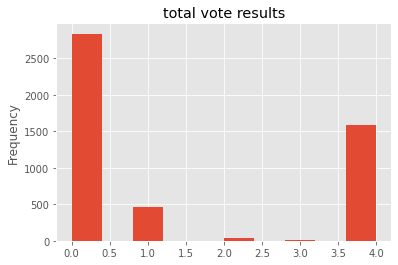

In [19]:
print(typesOfVotes)
df2 = pd.DataFrame.from_records(d, columns=['id', 'votingDate' , 'vote'])
df2['vote'].apply(lambda x : typesOfVotes.index(x)).plot.hist(title='total vote results')
plt.show()

ConversionError: Failed to convert value(s) to axis units: array([[Timestamp('2017-11-20 13:53:00'), 'yes'],
       [Timestamp('2017-11-20 13:53:00'), 'yes'],
       [Timestamp('2017-11-20 14:47:00'), 'no'],
       ...,
       [Timestamp('2019-12-18 12:52:00'), 'yes'],
       [Timestamp('2019-12-18 17:34:00'), 'yes'],
       [Timestamp('2019-12-18 17:58:00'), 'yes']], dtype=object)

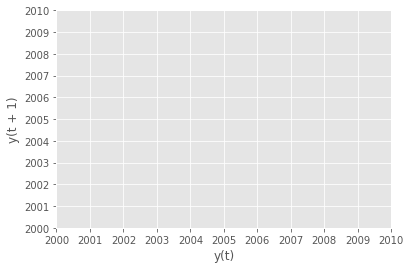